In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def swap(arr):
    for i in range(8):
        x1 = random.randint(0,99)
        y1 = random.randint(0,149)
        x2 = random.randint(0,99)
        y2 = random.randint(0,149)
        arr[x1,y1], arr[x2,y2] = arr[x2,y2], arr[x1,y1]        
        
        
        
def f_neighbour(arr, x, y):
    right = []
    F = [(x-1,y-1), (x-1,y), (x-1,y+1), (x,y-1), (x,y+1), (x+1,y-1), (x+1,y), (x+1,y+1)]
    for i,j in F:
        if i>=0 and i<=99 and j>=0 and j<=149:
            right.append((i, j))
    
    prob = [1, 0]         
    for i,j in right:
        if arr[i, j] == 0 :
            arr[i, j] = random.choices(prob ,weights = (25, 75) ,k=1)[0]
       
    
def s_neighbour(arr, x, y):
    right = []
    S = [(x-2,y-2), (x-2,y-1), (x-2,y), (x-2,y+1), (x-2,y+2), (x-1,y-2), (x-1,y+2), (x,y-2), (x,y+2), (x+1,y-2), (x+1,y+2), (x+2,y-2), (x+2,y-1), (x+2,y), (x+2,y+1), (x+2,y+2)]
    for i,j in S:
        if i>=0 and i<=99 and j>=0 and j<=149:
            right.append((i, j))
    
    prob = [1, 0]         
    for i,j in right:
        if arr[i, j] == 0 :
            arr[i, j] = random.choices(prob ,weights = (8, 92) ,k=1)[0]
       
        


arr = np.zeros((100,150),dtype=int)
arr[50, 75] = 1
positive = [1]
pos_added = [0]
spread = True
iteration = 0
report = []
while spread:
    swap(arr)
    spread = False
    for i in range(100):
        for j in range(150):
            if arr[i,j]==1:
                report.append((i,j))
            else:
                spread = True
            
    r_set = set(report)
    for x,y in r_set:
        f_neighbour(arr, x, y)
        s_neighbour(arr, x, y)
    iteration += 1
    positive.append(len(r_set))
    pos_added.append(positive[-1]-positive[-2])

In [17]:
print(positive)
print(pos_added)
print(iteration)

[1, 1, 4, 15, 36, 68, 111, 178, 251, 348, 463, 606, 760, 957, 1176, 1478, 1853, 2265, 2732, 3273, 3810, 4388, 4996, 5602, 6278, 6985, 7821, 8758, 9773, 10839, 11879, 12800, 13492, 13972, 14316, 14583, 14770, 14897, 14959, 14981, 14993, 14996, 14999, 15000]
[0, 0, 3, 11, 21, 32, 43, 67, 73, 97, 115, 143, 154, 197, 219, 302, 375, 412, 467, 541, 537, 578, 608, 606, 676, 707, 836, 937, 1015, 1066, 1040, 921, 692, 480, 344, 267, 187, 127, 62, 22, 12, 3, 3, 1]
43


Text(0, 0.5, 'No. of positive')

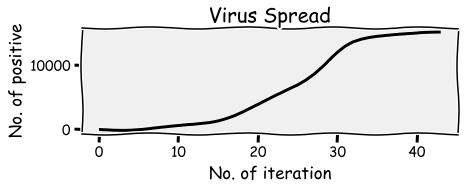

In [24]:
x = list(range(iteration+1))
plt.subplot(2,1,1)
plt.plot(x, positive, color = 'k', linewidth = 3)
plt.title('Virus Spread')
plt.xlabel('No. of iteration')
plt.ylabel('Total Cases')
#plt.xkcd()

Text(0, 0.5, 'Sases')

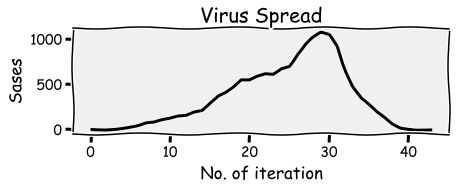

In [25]:
plt.subplot(2,1,2)
plt.plot(x, pos_added, color = 'k', linewidth = 3)
plt.title('Virus Spread')
plt.xlabel("No. of iteration")
plt.ylabel("Sases")

In [28]:
m = max(pos_added)
print("Peak value of plot 2 :", m)

Peak value of plot 2 : 1066
